<a href="https://colab.research.google.com/github/Ray-Aldred/Data-Science-Projects/blob/main/Jordan_Peterson_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
!pip install nltk
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Introduction 
Jordan Peterson, an eminent Canadian clinical psychologist, professor, and for some, a "public intellectual," gained prominence in the mid-2010s with his insights on a myriad of cultural and political issues. His initial notoriety originated from his opposition to Canada's Bill C-16, which he argues aimed to include gender identity and gender expression within the scope of prohibited grounds for discrimination. Peterson contended that this legislation would infringe upon free speech rights by necessitating the use of preferred gender pronouns. Nevertheless, his critics maintain that such encroachments on free speech are not accurately depicted in his portrayal.

Since 2010, Peterson has amassed a sizable online following, encompassing fervent supporters and ardent detractors alike. This has intensified the discourse surrounding his ideas, thereby reinforcing his controversial reputation. Significantly, Peterson has expressed skepticism about particular facets of gender identity and transgender rights, resulting in accusations of transphobia. Opponents argue that his perspectives cause harm and damages trans people and others in the LGBTQ+ community, while proponents believe he underscores valid concerns regarding the deterioration of free speech.

According to me and many other, Peterson may be regarded as a conservative figure, with his work often accentuating the importance of traditional values and structures—stances that some interpret as regressive or patriarchal. Additionally, he reproaches "radical leftist ideologies" and what he perceives as "neo-Marxism" within academia and society as a whole. His detectors would claim that those who he claims are neo-Marxists is ripe with contractions. 

As a prominent individual whose stances on gender identity and traditional values incite impassioned debate and controversy, Jordan Peterson's work resonates with a diverse audience while concurrently provoking powerful responses from both admirers and critics. Undertaking sentiment analysis on him would prove advantageous for various reasons, irrespective of one's personal inclination, and whether you are for him or against him:

1. Discerning audience responses: Sentiment analysis functions as a potent instrument for identifying and quantifying the emotions elicited by Peterson's tweets and statements among his audience. By delving into the perception of his ideas and arguments, researchers can cultivate a more profound comprehension of the public's reactions to his work.

2. Assessing polarization: As a polarizing figure, Jordan Peterson's tweets and statements provide an opportunity to gauge the extent of this polarization. Analyzing the sentiment associated with his communications can help pinpoint areas where his ideas evoke zealous support or opposition, thus revealing the contentious aspects of his work.

3. Tracing trends and patterns: By scrutinizing the sentiment of Peterson's tweets and statements over time, researchers can uncover evolving trends and patterns in public opinion, encompassing shifts in sentiment or the emergence of novel controversies. Such discoveries supply essential context for understanding the development of his ideas and their reception.

4. Unearthing insights into specific topics: Peterson's tweets and statements often address a wide range of subjects, spanning politics, psychology, and broader social issues. Sentiment analysis can expose which topics provoke the most intense emotional reactions, empowering researchers to determine which aspects of his work resonate most deeply with various segments of his audience.

In conclusion, sentiment analysis of Peterson's tweets and statements can offer substantial insights into audience reactions, polarization, emerging trends, and topic-specific responses. These insights contribute to a more nuanced understanding of his impact on public discourse. By conducting sentiment analysis on Jordan Peterson in general, we can glean invaluable insights into the emotional responses to his work, the level of polarization around his ideas, and the broader cultural and societal implications of his influence. There is a wealth of data to explore, with his Twitter feed and statements serving as an ideal starting point. By delving into this rich trove of information, we can begin to construct a comprehensive picture of how his ideas and arguments resonate with diverse audiences, how they spark debate and controversy, and ultimately, how they shape the public discourse on crucial societal issues.

Through careful examination and analysis of this data, researchers and observers can better understand the dynamics at play in the conversations surrounding Jordan Peterson. As a result, they may be able to identify key areas of consensus and disagreement, as well as opportunities for fostering greater understanding and constructive dialogue.

Ultimately, sentiment analysis of Jordan Peterson's tweets and statements offers a window into the complex and multifaceted world of public opinion, where passionate viewpoints and emotions often collide. By embracing the insights provided by this powerful analytical tool, we can strive for a more informed, empathetic, and nuanced engagement with the ideas and perspectives that shape our world.

# **1. Importing Libraries** 

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **2. Loading Data**

In [ ]:
df = pd.read_csv('/content/jordanbpeterson_tweets.csv')
df.head()

,id,created_at,text
0,1651997764639662081,2023-04-28 17:12:14+00:00,"What would even be more helpful, however, woul..."
1,1651996205671493634,2023-04-28 17:06:02+00:00,RT @jordanbpeterson: A Canadian social worker ...
2,1651973974962651141,2023-04-28 15:37:42+00:00,@Merterler52 Hey there Mert
3,1651972612031954946,2023-04-28 15:32:17+00:00,Let's take the city (and then the country) out...
4,1651972411347091456,2023-04-28 15:31:29+00:00,Hey! If you're young (or even not so young) an...


In [ ]:
df.tail()

,id,created_at,text
3176,1627499059224223745,2023-02-20 02:43:07+00:00,RT @joe_warmington: How about the person in th...
3177,1627498723528921089,2023-02-20 02:41:47+00:00,Imagine: actual immunity better than fake immu...
3178,1627498188096544769,2023-02-20 02:39:40+00:00,There is no excuse for this @PuffinBooks and y...
3179,1627498040998125570,2023-02-20 02:39:05+00:00,RT @RealPrichard: 🚨 VICTORY! HB 1254 which cri...
3180,1627497076119461889,2023-02-20 02:35:15+00:00,My Exodus series collaborator @GreggHurwitz's ...


# **3. Cleaning The Data**

In [ ]:
# Call the `info()` function on the DataFrame `df` to get a summary of its content
# The summary includes information about the columns, data types, and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3181 non-null   int64 
 1   created_at  3181 non-null   object
 2   text        3181 non-null   object
dtypes: int64(1), object(2)
memory usage: 74.7+ KB


In [ ]:
# check for missing or null values in each cell
df.isnull().sum()

id            0
created_at    0
text          0
dtype: int64

In [ ]:
# Call the `drop()` function on the DataFrame `df` to remove the specified columns
# The `axis=1` parameter indicates that the function should operate on columns, not rows (axis=0 would operate on rows)
# The resulting DataFrame, with the specified columns removed, is assigned to a new variable called `text_df`
text_df = df.drop(['id', 'created_at'], axis=1)
text_df.head()

,text
0,"What would even be more helpful, however, woul..."
1,RT @jordanbpeterson: A Canadian social worker ...
2,@Merterler52 Hey there Mert
3,Let's take the city (and then the country) out...
4,Hey! If you're young (or even not so young) an...


### **Preprocessioning the data** 

In [ ]:
# Define a function called `data_processing` that takes a single input parameter `text`
def data_processing(text):
    # Convert the input text to lowercase
    text = text.lower()
    
    # Remove URLs from the text using a regular expression (regex)
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags from the text using regex
    text = re.sub(r'\@w+|\#', '', text)
    
    # Remove punctuation from the text using regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text into individual words using the `word_tokenize` function from the NLTK library
    text_tokens = word_tokenize(text)
    
    # Filter out stopwords from the tokenized words including filtering out 'rt'
    # `stop_words` is assumed to be a predefined set or list of common words to be excluded from analysis
    filtered_text = [w for w in text_tokens if not w in stop_words and w != 'rt']
    
    # Join the filtered words back into a single string, separated by spaces, and return the result
    return " ".join(filtered_text)

In [ ]:
# This applies the `data_processing` function to each element in the 'text' column
# The result is a cleaned and preprocessed version of the text data in each row of the column
text_df.text = text_df['text'].apply(data_processing)
text_df.head()

,text
0,would even helpful however would someone looki...
1,jordanbpeterson canadian social worker fired d...
2,merterler52 hey mert
3,lets take city country hands woke mob get join...
4,hey youre young even young work responsibility...


In [ ]:
# Instantiate a PorterStemmer object from the NLTK library
stemmer = PorterStemmer()

# Define a function called `stemming` that takes a single input parameter `data`
def stemming(data):
    # Tokenize the input text into individual words
    words = word_tokenize(data)
    
    # Stem each word in the tokenized list
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text


In [ ]:
# The result is a version of the text data in each row of the column with words reduced to their stemmed (root) forms
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,text
0,would even help howev would someon look social...
1,jordanbpeterson canadian social worker fire da...
2,merterler52 hey mert
3,let take citi countri hand woke mob get joint ...
4,hey your young even young work respons help yo...


# **4. A Deeper Sentiment Analysis with RoBERTa**
Introduced in 2019, RoBERTa is a sophisticated masked language model that has captivated the field of natural language processing. As an extension of the widely acclaimed Bidirectional Encoder Representations from Transformers (BERT) model, RoBERTa was expertly crafted by the dedicated team at Facebook AI Research (FAIR).

Built on a monumental scale, RoBERTa harnesses the power of diverse and abundant training data, meticulously sourced from a myriad of books, articles, and websites. Its innovative approach, which employs "dynamic word masking," has elevated the model's performance in a multitude of downstream tasks, making it a remarkable tool in the realm of NLP.

RoBERTa's exceptional abilities have not only led it to excel in an array of NLP challenges but have also enabled it to surpass its predecessor, BERT, in multiple benchmarks. This is exemplified by its extraordinary achievements on the GLUE and SuperGLUE leaderboards.

However, RoBERTa is not without its shortcomings. The model's immense size and computational demands pose significant challenges for training and deployment, requiring considerable resources to effectively utilize its full potential.

In summary, RoBERTa is a trailblazing language model that has remarkably advanced the state of the art in natural language processing, becoming a cornerstone of innovation and progress within the field.  

In [ ]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

In [ ]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']

text_df['sentiment'] = text_df['text'].apply(classify_sentiment)

positive_tweets = text_df[text_df['sentiment'] == 'LABEL_2'].shape[0]
negative_tweets = text_df[text_df['sentiment'] == 'LABEL_0'].shape[0]
neutral_tweets = text_df[text_df['sentiment'] == 'LABEL_1'].shape[0]

print(f"Positive tweets: {positive_tweets}")
print(f"Negative tweets: {negative_tweets}")
print(f"Neutral tweets: {neutral_tweets}")

Positive tweets: 185
Negative tweets: 690
Neutral tweets: 2306


* There is a whopping amount of negative tweets in this data set! Let's put this in  pie chart. 



# **5. Exploratory Analysis** 

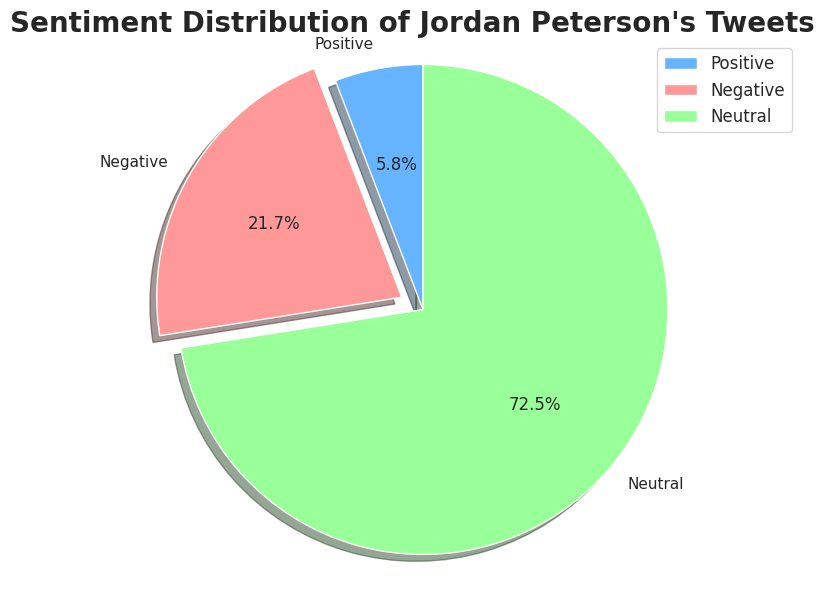

In [ ]:
sentiment_counts = [positive_tweets, negative_tweets, neutral_tweets]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
explode = (0, 0.1, 0)

# Create a pie chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title("Sentiment Distribution of Jordan Peterson's Tweets", fontsize=20, fontweight='bold')
plt.axis('equal')  # Ensures the pie chart is a circle

# Customize legend
plt.legend(sentiment_labels, loc='best', fontsize=12, frameon=True, framealpha=0.8)

# Show the pie chart
plt.show()

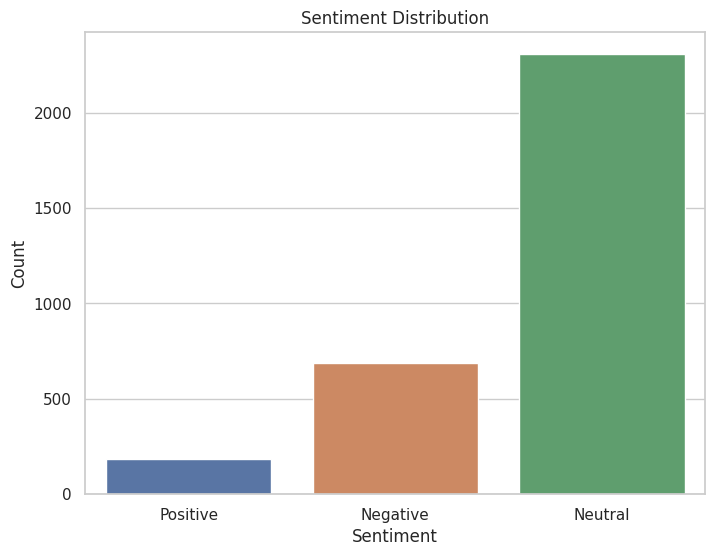

In [ ]:
# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.barplot(x=sentiment_labels, y=sentiment_counts)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Show the bar chart
plt.show()

### **Exploring the negative words** 

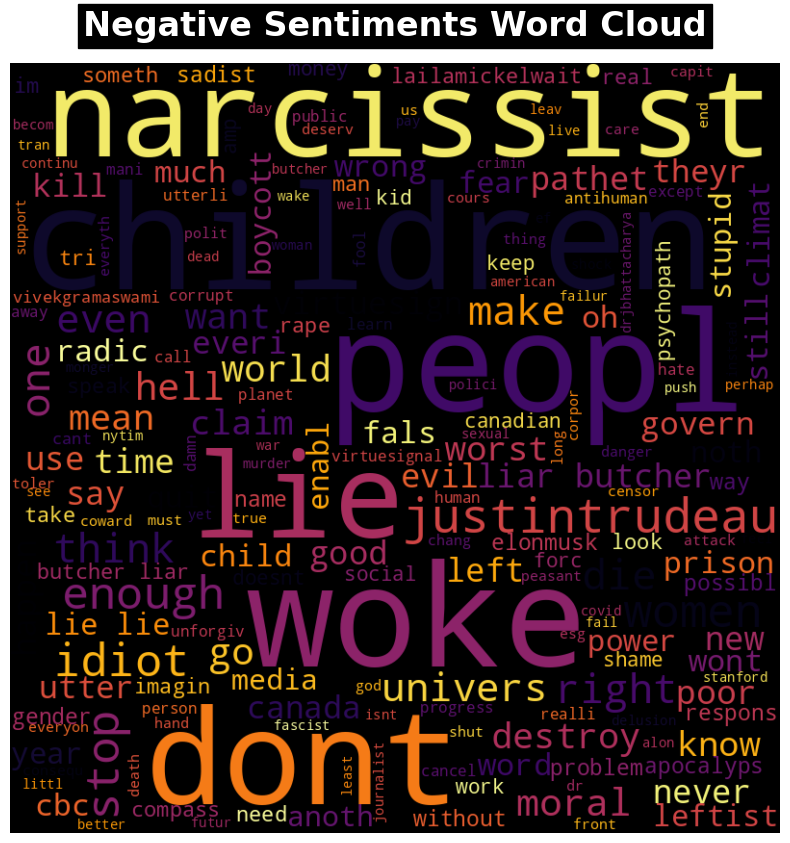

In [ ]:
negative_tweets_df = text_df[text_df['sentiment'] == 'LABEL_0']

# Combine all the negative tweets into a single string
negative_tweets_text = ' '.join(tweet for tweet in negative_tweets_df['text'])

# Create a WordCloud object with custom settings
wordcloud = WordCloud(
    background_color='black',
    width=800,
    height=800,
    max_words=200,
    max_font_size=150,
    colormap='inferno',
    contour_width=3,
    contour_color='white',
).generate(negative_tweets_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiments Word Cloud', fontsize=24, fontweight='bold', color='white', backgroundcolor='black', pad=20)

# Show the word cloud
plt.show()

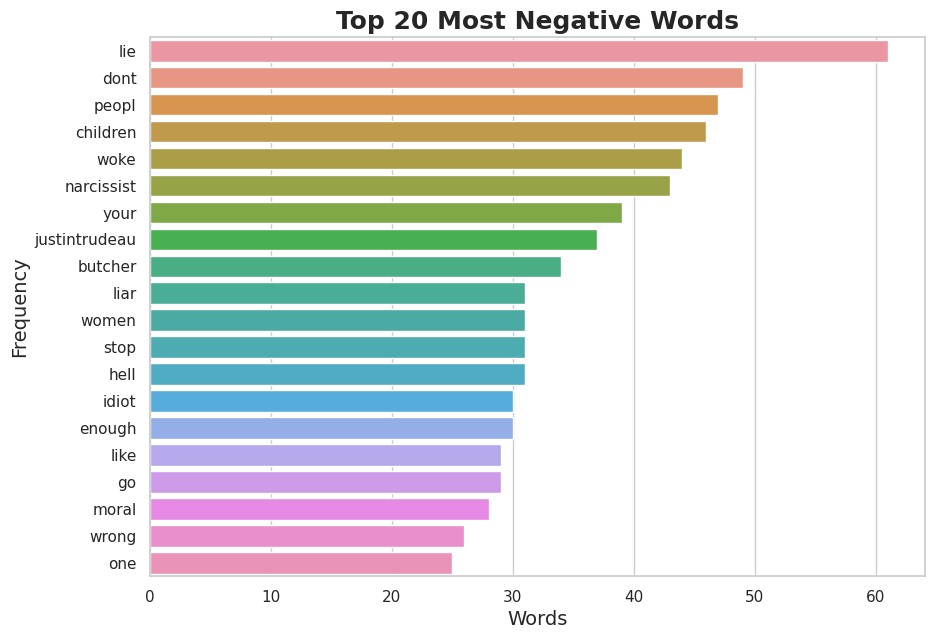

In [ ]:
# Tokenize the negative tweets into individual words
negative_words = negative_tweets_text.split()

# Define the number of most frequent words to plot
k = 20

# Count the frequency of each word and sort them by frequency
word_freq = Counter(negative_words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:k]

# Extract the words and their frequencies from the sorted list
words = [word[0] for word in sorted_word_freq]
freqs = [word[1] for word in sorted_word_freq]

# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
sns.barplot(x=freqs, y=words)
plt.title(f"Top {k} Most Negative Words", fontsize=18, fontweight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the bar chart
plt.show()

### **Exploring the positive words**

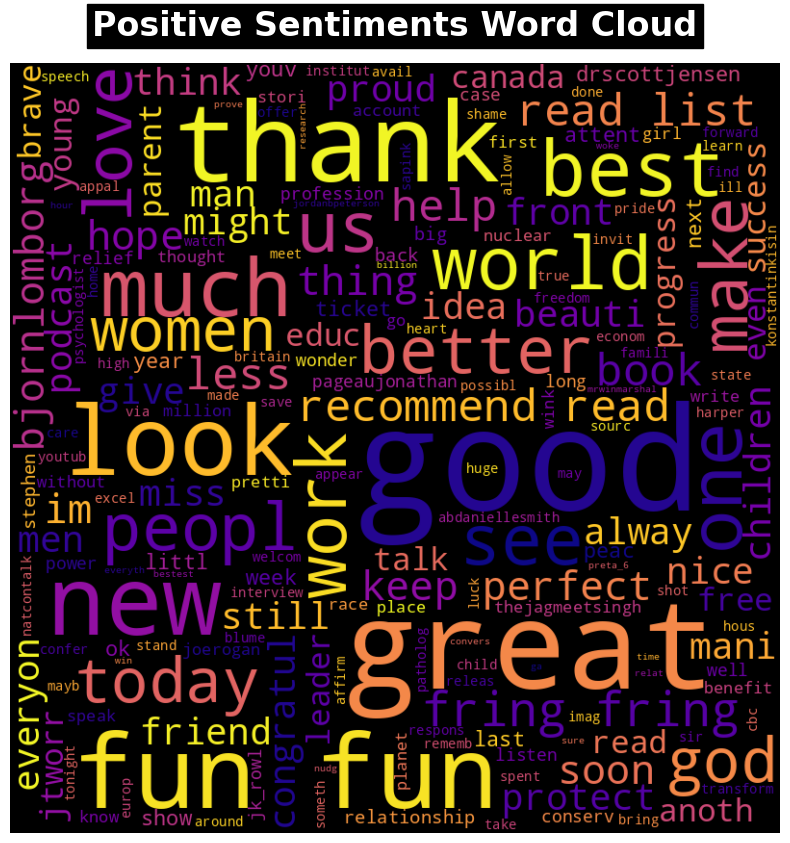

In [ ]:
positive_tweets_df = text_df[text_df['sentiment'] == 'LABEL_2']

# Combine all the positive tweets into a single string
positive_tweets_text = ' '.join(tweet for tweet in positive_tweets_df['text'])

# Create a WordCloud object with custom settings
wordcloud = WordCloud(
    background_color='black',
    width=800,
    height=800,
    max_words=200,
    max_font_size=150,
    colormap='plasma',
    contour_width=3,
    contour_color='white',
).generate(positive_tweets_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiments Word Cloud', fontsize=24, fontweight='bold', color='white', backgroundcolor='black', pad=20)

# Show the word cloud
plt.show()

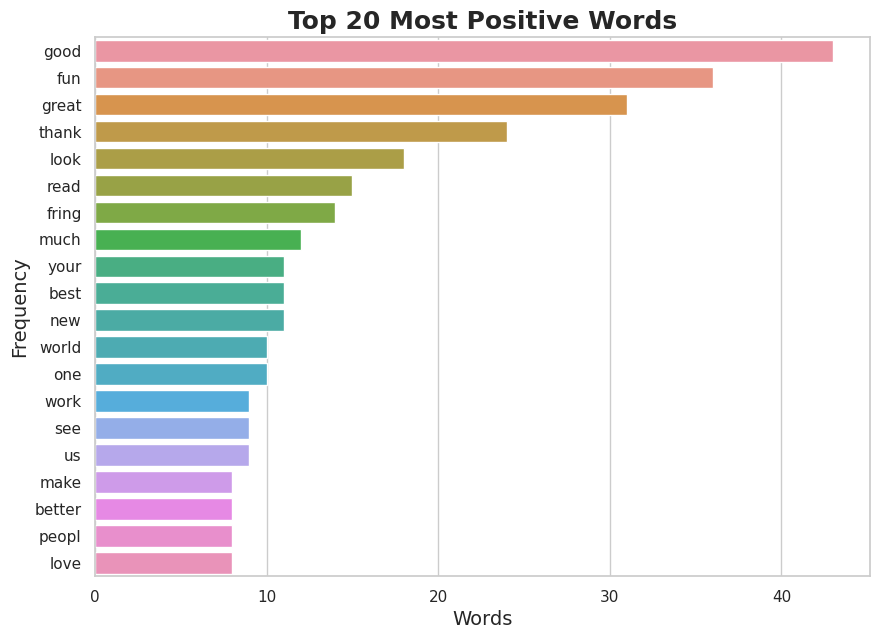

In [ ]:
# Tokenize the positive tweets into individual words
positive_words = positive_tweets_text.split()

# Define the number of most frequent words to plot
k = 20

# Count the frequency of each word and sort them by frequency
word_freq = Counter(positive_words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:k]

# Extract the words and their frequencies from the sorted list
words = [word[0] for word in sorted_word_freq]
freqs = [word[1] for word in sorted_word_freq]

# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
sns.barplot(x=freqs, y=words)
plt.title(f"Top {k} Most Positive Words", fontsize=18, fontweight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the bar chart
plt.show()

## More to come....